In [1]:
%matplotlib inline

import os
import sys
import math
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import invisible_cities.core.fit_functions  as fitf
from   invisible_cities.core.core_functions import in_range
from   invisible_cities.core.core_functions import shift_to_bin_centers

In [3]:
# Plotting style
default_cmap = "jet"
figure_size  = 12.5, 8
font_size    = 15

plt.rcParams["figure.figsize"] = figure_size
plt.rcParams[  "font.size"   ] =   font_size

In [4]:
thr     = 2 # minimum charge in pes to consider a SiPM in the reconstruction
n_files = 300 # total number of files to be analyzed
rad_min = 380 # minimum radius in mm
rad_max = 380 + 30 # maximum radius in mm

folder         = '/path/to/r_map/files'
file_base_name = 'r_map_file'

In [5]:
true_r1, true_r2, var_phi1, var_phi2, var_z1, var_z2 = [], [], [], [], [], []
touched_sipms1, touched_sipms2 = [], []

bunch = 20
for f in range(0, n_files, bunch):
    filename = folder + file_base_name + '.{0}_{1}_{2}.npz'.format(f, bunch, thr)
    try:
        d = np.load(filename)
    except:
        print('File {} not found'.format(filename))
        continue  
        
        
    true_r1  = np.concatenate((true_r1, d['a_true_r1']))
    true_r2  = np.concatenate((true_r2, d['a_true_r2']))
    var_phi1 = np.concatenate((var_phi1, d['a_var_phi1']))
    var_phi2 = np.concatenate((var_phi2, d['a_var_phi2']))
    var_z1   = np.concatenate((var_z1, d['a_var_z1']))
    var_z2   = np.concatenate((var_z2, d['a_var_z2']))
    touched_sipms1 = np.concatenate((touched_sipms1, d['a_touched_sipms1']))
    touched_sipms2 = np.concatenate((touched_sipms2, d['a_touched_sipms2']))
    
true_r1 = np.array(true_r1)
true_r2 = np.array(true_r2)
var_phi1 = np.array(var_phi1)
var_phi2 = np.array(var_phi2)
var_z1 = np.array(var_z1)
var_z2 = np.array(var_z2)
touched_sipms1 = np.array(touched_sipms1)
touched_sipms2 = np.array(touched_sipms2)

<Figure size 864x576 with 0 Axes>

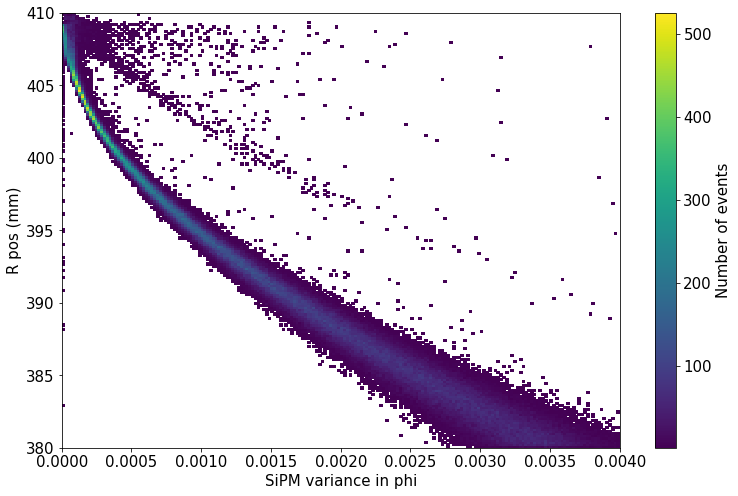

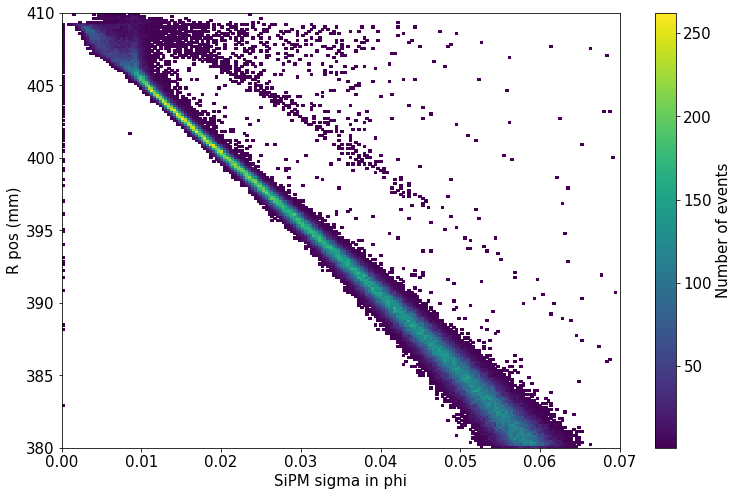

In [6]:
fig = plt.figure(1)
fig.set_figwidth(12.)
fig.set_figheight(8.)

valid1 = var_phi1 < 1.e9
valid2 = var_phi2 < 1.e9

bins = 200
var_phi = np.concatenate((var_phi1[valid1], var_phi2[valid2]))
var_z = np.concatenate((var_z1[valid1], var_z2[valid2]))
radius = np.concatenate((true_r1[valid1], true_r2[valid2]))
touched_sipm = np.concatenate((touched_sipms1[valid1], touched_sipms2[valid2]))

var_phi = np.array(var_phi)
var_z = np.array(var_z)
radius = np.array(radius)
touched_sipm = np.array(touched_sipm)

figures = True
if figures:
   
    plt.figure()
    
    h2 = plt.hist2d(var_phi, radius, bins=(bins, bins),  range=((0, 0.004), (rad_min, rad_max)), cmin = 1)
    plt.xlabel('SiPM variance in phi')
    plt.ylabel('R pos (mm)')
    plt.colorbar().set_label("Number of events")

    plt.figure()
    
    h3 = plt.hist2d(np.sqrt(var_phi), radius, bins=(bins, bins),  range=((0, 0.07), (rad_min, rad_max)), cmin = 1)
    plt.xlabel('SiPM sigma in phi')
    plt.ylabel('R pos (mm)')
    plt.colorbar().set_label("Number of events");

In [7]:
x1 = 0.01
y1 = 408
x2 = 0.065
y2 = 384
m = (y2-y1)/(x2-x1)
a = 412.8

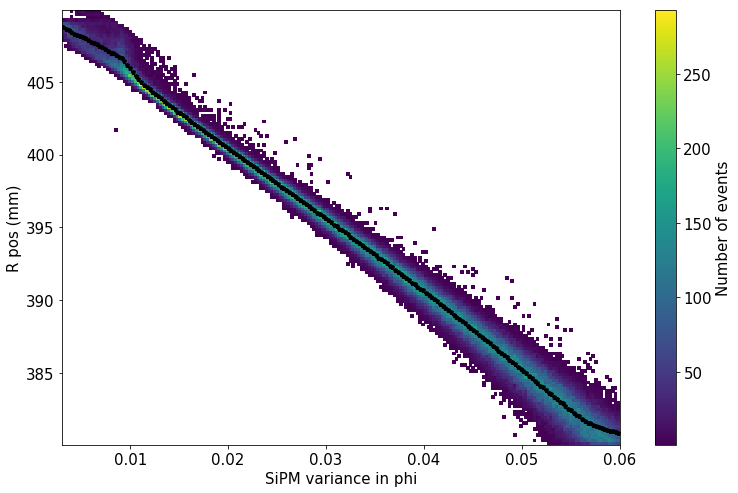

In [8]:
radlim = rad_min, rad_max
var_philim = 0.003, 0.06

rad = radius
rms_phi = np.sqrt(var_phi)

sel   = in_range(rad, *radlim) & in_range(rms_phi, *var_philim)
sel_2 = rad < (a + m*rms_phi)
vphi, r = rms_phi[sel & sel_2], rad[sel & sel_2]

Rbins = 150
Varphibins = 200

plt.hist2d(vphi, r, (Varphibins, Rbins), cmin=1)

x, y, yu = fitf.profileX(vphi, r, Varphibins, var_philim, drop_nan=False)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=5, lw=2)
plt.xlabel('SiPM variance in phi')
plt.ylabel('R pos (mm)')
#plt.ylim([125, 130])
plt.colorbar().set_label("Number of events")

In [9]:
y

array([408.7695251 , 408.67324174, 408.56123594, 408.43447088,
       408.33526799, 408.26278949, 408.18237729, 408.10412448,
       408.02027796, 407.92061464, 407.77880064, 407.68870835,
       407.61756126, 407.49961911, 407.39003879, 407.25238981,
       407.15756809, 407.0190833 , 406.96175243, 406.82706387,
       406.72875021, 406.63615055, 406.43846227, 406.17311451,
       405.94145244, 405.67800755, 405.40629461, 405.22213286,
       405.00607636, 404.81930794, 404.6544661 , 404.48810646,
       404.3435199 , 404.18979803, 404.04443905, 403.88350893,
       403.71480056, 403.55741244, 403.42425175, 403.28101563,
       403.14441344, 402.97155933, 402.83651928, 402.69733246,
       402.56290433, 402.4038391 , 402.2778147 , 402.11933185,
       401.98680627, 401.84241873, 401.7174678 , 401.56015602,
       401.4182378 , 401.27558246, 401.15564441, 400.99560829,
       400.888615  , 400.72859742, 400.58355851, 400.46199778,
       400.3202647 , 400.15792157, 400.02678937, 399.88

In [10]:
x

array([0.0031425, 0.0034275, 0.0037125, 0.0039975, 0.0042825, 0.0045675,
       0.0048525, 0.0051375, 0.0054225, 0.0057075, 0.0059925, 0.0062775,
       0.0065625, 0.0068475, 0.0071325, 0.0074175, 0.0077025, 0.0079875,
       0.0082725, 0.0085575, 0.0088425, 0.0091275, 0.0094125, 0.0096975,
       0.0099825, 0.0102675, 0.0105525, 0.0108375, 0.0111225, 0.0114075,
       0.0116925, 0.0119775, 0.0122625, 0.0125475, 0.0128325, 0.0131175,
       0.0134025, 0.0136875, 0.0139725, 0.0142575, 0.0145425, 0.0148275,
       0.0151125, 0.0153975, 0.0156825, 0.0159675, 0.0162525, 0.0165375,
       0.0168225, 0.0171075, 0.0173925, 0.0176775, 0.0179625, 0.0182475,
       0.0185325, 0.0188175, 0.0191025, 0.0193875, 0.0196725, 0.0199575,
       0.0202425, 0.0205275, 0.0208125, 0.0210975, 0.0213825, 0.0216675,
       0.0219525, 0.0222375, 0.0225225, 0.0228075, 0.0230925, 0.0233775,
       0.0236625, 0.0239475, 0.0242325, 0.0245175, 0.0248025, 0.0250875,
       0.0253725, 0.0256575, 0.0259425, 0.0262275, 

In [11]:
rmsphinBins = [100, 150, 200]
rmsphiRange = var_philim
rmsphiBins  = {n: np.linspace(*rmsphiRange, n + 1) for n in rmsphinBins}
rmsphiCenters = {n: shift_to_bin_centers(bins) for n, bins in rmsphiBins.items()}
rmsphiPitch = {n: np.diff(bins)[0] for n, bins in rmsphiBins.items()}

In [12]:
rmsphiBins

{100: array([0.003  , 0.00357, 0.00414, 0.00471, 0.00528, 0.00585, 0.00642,
        0.00699, 0.00756, 0.00813, 0.0087 , 0.00927, 0.00984, 0.01041,
        0.01098, 0.01155, 0.01212, 0.01269, 0.01326, 0.01383, 0.0144 ,
        0.01497, 0.01554, 0.01611, 0.01668, 0.01725, 0.01782, 0.01839,
        0.01896, 0.01953, 0.0201 , 0.02067, 0.02124, 0.02181, 0.02238,
        0.02295, 0.02352, 0.02409, 0.02466, 0.02523, 0.0258 , 0.02637,
        0.02694, 0.02751, 0.02808, 0.02865, 0.02922, 0.02979, 0.03036,
        0.03093, 0.0315 , 0.03207, 0.03264, 0.03321, 0.03378, 0.03435,
        0.03492, 0.03549, 0.03606, 0.03663, 0.0372 , 0.03777, 0.03834,
        0.03891, 0.03948, 0.04005, 0.04062, 0.04119, 0.04176, 0.04233,
        0.0429 , 0.04347, 0.04404, 0.04461, 0.04518, 0.04575, 0.04632,
        0.04689, 0.04746, 0.04803, 0.0486 , 0.04917, 0.04974, 0.05031,
        0.05088, 0.05145, 0.05202, 0.05259, 0.05316, 0.05373, 0.0543 ,
        0.05487, 0.05544, 0.05601, 0.05658, 0.05715, 0.05772, 0.05829,
 

In [13]:
R_ave = {}
R_ave_u = {}

for n in rmsphiBins:
    x, y, yu = fitf.profileX(vphi, r, n, rmsphiRange, drop_nan=False)
    R_ave[n] = y
    R_ave_u[n] = yu

### Produce HDF5 R table

In [16]:
from antea.utils.map_functions import map_writer

t_folder = '/path/to/table/'

r_table_name = t_folder + 'r_table_thr{}pe.h5'.format(thr)
group = 'Radius'

with tb.open_file(r_table_name, "w") as output_file:
    
    for n in rmsphiBins:
        pitch  = rmsphiPitch[n]
        table_name = 'phirmsr{0}pes{1}bins'.format(thr, n)
        writer = map_writer(output_file, group, table_name)
        
        for i, rmsphi in enumerate(rmsphiCenters[n], start=0):
            writer(rmsphi, R_ave[n][i], R_ave_u[n][i] * R_ave[n][i] / 100)
            
        table = getattr(getattr(output_file.root, group), table_name)
        table.attrs.rmsphi_bins = n
        table.attrs.rmsphi_pitch = pitch